In [1]:
from iotools import read_AsciiGrid
from soilprofile2D import gwl_Wsto
from soilprofile2D import gwl_Wsto_vectorized
import numpy as np
from parameters_krycklan import deep_properties
deepp = deep_properties()
import matplotlib.pyplot as plt

file = r'/Users/jpnousu/SpaFHy_RUNS/krycklan/gis/25m_0case/soil.asc'
soil = read_AsciiGrid(file)[0]

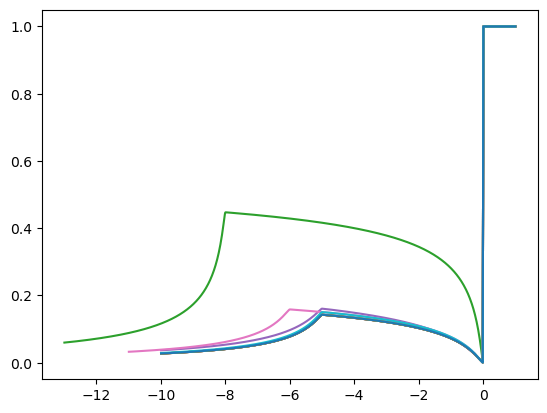

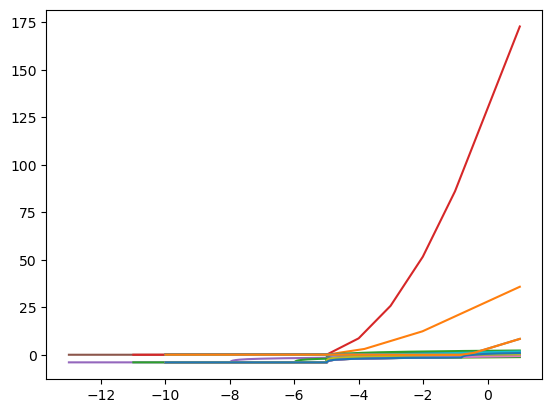

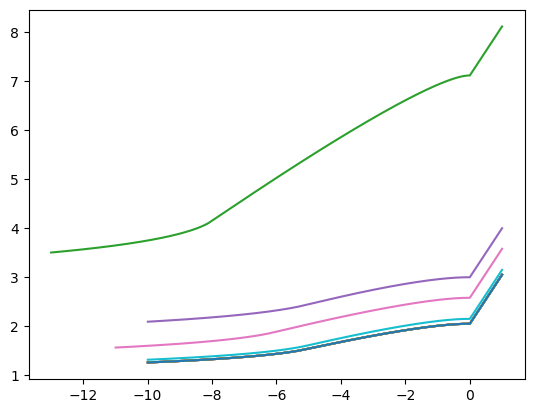

In [2]:
data2 = {}
data2['deep_id'] = soil
data2.update({'soiltype': np.empty(np.shape(data2['deep_id']),dtype=object)})

for key, value in deepp.items():
    c = value['deep_id']
    ix = np.where(data2['deep_id'] == c)
    data2['soiltype'][ix] = key
    #value['deep_z'][-1] = -50.
    # interpolation function between wsto and gwl
    value.update(gwl_Wsto(value['deep_z'], value['pF'], -0.01, value['deep_ksat']))
    # interpolation function between root_wsto and gwl
    value.update(gwl_Wsto(value['deep_z'][:2], {key: value['pF'][key][:2] for key in value['pF'].keys()}, root=True))

data2['wtso_to_gwl'] = {soiltype: deepp[soiltype]['to_gwl'] for soiltype in deepp.keys()}
data2['gwl_to_wsto'] = {soiltype: deepp[soiltype]['to_wsto'] for soiltype in deepp.keys()}
data2['gwl_to_C'] = {soiltype: deepp[soiltype]['to_C'] for soiltype in deepp.keys()}
data2['gwl_to_Tr'] = {soiltype: deepp[soiltype]['to_Tr'] for soiltype in deepp.keys()}
data2['gwl_to_rootmoist'] = {soiltype: deepp[soiltype]['to_rootmoist'] for soiltype in deepp.keys()}

In [3]:
data = {}
data['deep_id'] = soil
data.update({'soiltype': np.empty(np.shape(data['deep_id']),dtype=object)})

for key, value in deepp.items():
    c = value['deep_id']
    ix = np.where(data['deep_id'] == c)
    data['soiltype'][ix] = key
    #value['deep_z'][-1] = -50.
    # interpolation function between wsto and gwl
    value.update(gwl_Wsto_vectorized(value['deep_z'], value['pF'], -0.01, value['deep_ksat']))
    # interpolation function between root_wsto and gwl
    value.update(gwl_Wsto_vectorized(value['deep_z'][:2], {key: value['pF'][key][:2] for key in value['pF'].keys()}, root=True))

data['wtso_to_gwl'] = {soiltype: deepp[soiltype]['to_gwl'] for soiltype in deepp.keys()}
data['gwl_to_C'] = {soiltype: deepp[soiltype]['to_C'] for soiltype in deepp.keys()}
data['gwl_to_wsto'] = {soiltype: deepp[soiltype]['to_wsto'] for soiltype in deepp.keys()}
data['gwl_to_Tr'] = {soiltype: deepp[soiltype]['to_Tr'] for soiltype in deepp.keys()}
data['gwl_to_rootmoist'] = {soiltype: deepp[soiltype]['to_rootmoist'] for soiltype in deepp.keys()}

In [4]:
data3 = {}
data3['deep_id'] = soil
data3.update({'soiltype': np.empty(np.shape(data3['deep_id']),dtype=object)})

for key, value in deepp.items():
    c = value['deep_id']
    ix = np.where(data['deep_id'] == c)
    data3['soiltype'][ix] = key
    #value['deep_z'][-1] = -50.
    # interpolation function between wsto and gwl
    value.update(gwl_Wsto_vectorized(value['deep_z'], value['pF'], 'var', value['deep_ksat']))
    # interpolation function between root_wsto and gwl
    value.update(gwl_Wsto_vectorized(value['deep_z'][:2], {key: value['pF'][key][:2] for key in value['pF'].keys()}, root=True))

data3['wtso_to_gwl'] = {soiltype: deepp[soiltype]['to_gwl'] for soiltype in deepp.keys()}
data3['gwl_to_C'] = {soiltype: deepp[soiltype]['to_C'] for soiltype in deepp.keys()}
data3['gwl_to_wsto'] = {soiltype: deepp[soiltype]['to_wsto'] for soiltype in deepp.keys()}
data3['gwl_to_Tr'] = {soiltype: deepp[soiltype]['to_Tr'] for soiltype in deepp.keys()}
data3['gwl_to_rootmoist'] = {soiltype: deepp[soiltype]['to_rootmoist'] for soiltype in deepp.keys()}

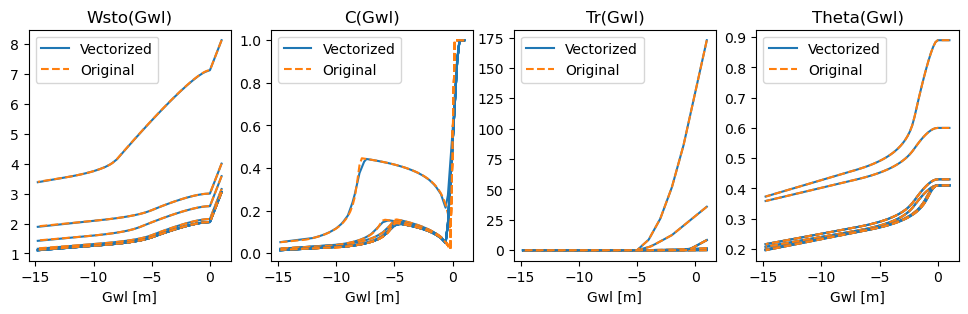

In [6]:
from matplotlib.lines import Line2D

gwl = np.arange(1.0, -15, -0.2)

to_gwl1 = []
to_gwl2 = []
to_wsto1 = []
to_wsto2 = []
to_C1 = []
to_C2 = []
to_Tr1 = []
to_Tr2 = []
to_theta1 = []
to_theta2 = []

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,3));
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]

for key in data['wtso_to_gwl'].keys():
    for g in gwl:
        to_wsto1.append(data['gwl_to_wsto'][key][0](g))
        to_wsto2.append(data2['gwl_to_wsto'][key](g))
        to_C1.append(data['gwl_to_C'][key][0](g))
        to_C2.append(data2['gwl_to_C'][key](g))
        to_Tr1.append(data['gwl_to_Tr'][key][0](g))
        to_Tr2.append(data2['gwl_to_Tr'][key](g))       
        to_theta1.append(data['gwl_to_rootmoist'][key][0](g))
        to_theta2.append(data2['gwl_to_rootmoist'][key](g))  

    ax1.plot(gwl, to_wsto1, color='tab:blue')
    ax1.plot(gwl, to_wsto2, color='tab:orange', linestyle='--')
    ax2.plot(gwl, to_C1, color='tab:blue')
    ax2.plot(gwl, to_C2, color='tab:orange', linestyle='--')
    ax3.plot(gwl, to_Tr1, color='tab:blue')
    ax3.plot(gwl, to_Tr2, color='tab:orange', linestyle='--')
    ax4.plot(gwl, to_theta1, color='tab:blue')
    ax4.plot(gwl, to_theta2, color='tab:orange', linestyle='--')

    to_wsto1 = []
    to_wsto2 = []
    to_C1 = []
    to_C2 = []
    to_Tr1 = []
    to_Tr2 = []
    to_theta1 = []
    to_theta2 = []

ax1.set_title('Wsto(Gwl)')
ax2.set_title('C(Gwl)')
ax3.set_title('Tr(Gwl)')
ax4.set_title('Theta(Gwl)')

# Define legend handles
legend_elements = [
    Line2D([0], [0], color='tab:blue', label='Vectorized'),
    Line2D([0], [0], color='tab:orange', linestyle='--', label='Original')
]

# Add legend to each subplot
for ax in axs:
    ax.legend(handles=legend_elements, loc='best')
    ax.set_xlabel('Gwl [m]')

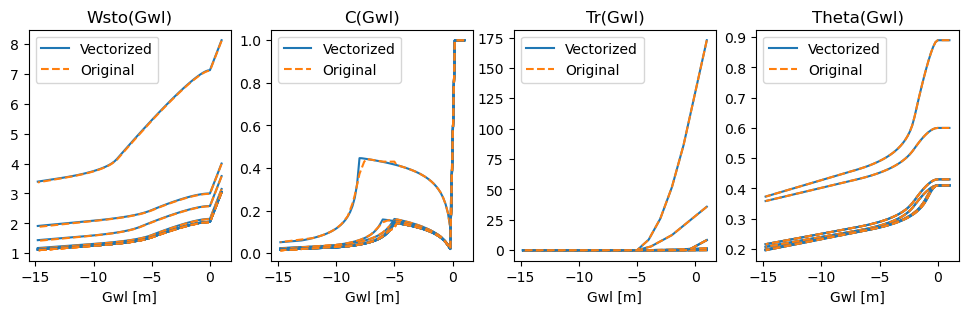

In [5]:
from matplotlib.lines import Line2D

gwl = np.arange(1.0, -15, -0.2)

to_gwl1 = []
to_gwl2 = []
to_wsto1 = []
to_wsto2 = []
to_C1 = []
to_C2 = []
to_Tr1 = []
to_Tr2 = []
to_theta1 = []
to_theta2 = []

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,3));
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]

for key in data['wtso_to_gwl'].keys():
    for g in gwl:
        to_wsto1.append(data['gwl_to_wsto'][key][0](g))
        to_wsto2.append(data3['gwl_to_wsto'][key][0](g))
        to_C1.append(data['gwl_to_C'][key][0](g))
        to_C2.append(data3['gwl_to_C'][key][0](g))
        to_Tr1.append(data['gwl_to_Tr'][key][0](g))
        to_Tr2.append(data3['gwl_to_Tr'][key][0](g))       
        to_theta1.append(data['gwl_to_rootmoist'][key][0](g))
        to_theta2.append(data3['gwl_to_rootmoist'][key][0](g))  

    ax1.plot(gwl, to_wsto1, color='tab:blue')
    ax1.plot(gwl, to_wsto2, color='tab:orange', linestyle='--')
    ax2.plot(gwl, to_C1, color='tab:blue')
    ax2.plot(gwl, to_C2, color='tab:orange', linestyle='--')
    ax3.plot(gwl, to_Tr1, color='tab:blue')
    ax3.plot(gwl, to_Tr2, color='tab:orange', linestyle='--')
    ax4.plot(gwl, to_theta1, color='tab:blue')
    ax4.plot(gwl, to_theta2, color='tab:orange', linestyle='--')

    to_wsto1 = []
    to_wsto2 = []
    to_C1 = []
    to_C2 = []
    to_Tr1 = []
    to_Tr2 = []
    to_theta1 = []
    to_theta2 = []

ax1.set_title('Wsto(Gwl)')
ax2.set_title('C(Gwl)')
ax3.set_title('Tr(Gwl)')
ax4.set_title('Theta(Gwl)')

# Define legend handles
legend_elements = [
    Line2D([0], [0], color='tab:blue', label='Vectorized'),
    Line2D([0], [0], color='tab:orange', linestyle='--', label='Original')
]

# Add legend to each subplot
for ax in axs:
    ax.legend(handles=legend_elements, loc='best')
    ax.set_xlabel('Gwl [m]')